In [1]:
import os
import json
from tqdm import tqdm

def convert_imcoords_to_bbox(imcoords):
    # imcoords는 문자열 형태의 좌표를 파싱하여 리스트로 변환
    coords = list(map(float, imcoords.split(',')))
    x_values = coords[0::2]  # 짝수 인덱스는 x 좌표
    y_values = coords[1::2]  # 홀수 인덱스는 y 좌표
    
    # 좌표로부터 bbox의 중심 좌표(cx, cy), 너비(width), 높이(height) 계산
    x_min = min(x_values)
    x_max = max(x_values)
    y_min = min(y_values)
    y_max = max(y_values)
    
    cx = (x_min + x_max) / 2
    cy = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    
    return cx, cy, width, height

def filter_and_modify_json(directory, output_directory):
    # 지정된 디렉토리 내 모든 JSON 파일 확인
    for filename in tqdm(os.listdir(directory), desc="Processing files", unit="file"):
        if filename.endswith(".json"):
            input_file_path = os.path.join(directory, filename).replace('\\', '/')
            
            with open(input_file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
            
            # 새로운 피처 저장 리스트
            filtered_features = []

            # 'features' 필드가 있는지 확인하고 반복
            if 'features' in data:
                for feature in data['features']:
                    if 'properties' in feature:
                        type_name = feature['properties'].get('type_name')
                        
                        # 'type_name'이 'ship(S)' 또는 'ship(L)'인 경우만 처리
                        if type_name in ['ship(S)', 'ship(L)']:
                            imcoords = feature['properties'].get('object_imcoords')
                            if imcoords:
                                # 좌표 변환 후 새로운 값 추가
                                cx, cy, width, height = convert_imcoords_to_bbox(imcoords)
                                feature['properties']['cx'] = cx
                                feature['properties']['cy'] = cy
                                feature['properties']['width'] = width
                                feature['properties']['height'] = height
                                
                                # 기존 데이터와 함께 새로운 properties로 업데이트
                                filtered_features.append(feature)

            # 새로운 JSON 구조 생성
            if filtered_features:
                new_data = {
                    "type": "FeatureCollection",
                    "features": filtered_features
                }

                # 출력 경로 설정 (출력 폴더에 저장)
                output_file_path = os.path.join(output_directory, filename).replace('\\', '/')
                with open(output_file_path, 'w', encoding='utf-8') as outfile:
                    json.dump(new_data, outfile, ensure_ascii=False, indent=4)
import os
import json

def check_for_other_classes(directory):
    other_classes_found = False
    other_classes = set()

    # 지정된 디렉토리 내 모든 JSON 파일 확인
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename).replace('\\', '/')
            
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
            
            # 'features' 필드가 있는지 확인하고 반복
            if 'features' in data:
                for feature in data['features']:
                    if 'properties' in feature:
                        type_name = feature['properties'].get('type_name')
                        
                        # 'ship(S)' 또는 'ship(L)' 외의 다른 클래스가 있는지 확인
                        if type_name not in ['ship(S)', 'ship(L)']:
                            other_classes_found = True
                            other_classes.add(type_name)

    # 결과 출력
    if other_classes_found:
        print("다른 클래스가 발견되었습니다:", other_classes)
    else:
        print("모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.")

In [2]:
# 사용 예시
input_directory = './train_objects_labels'  # 입력 JSON 파일들이 있는 폴더
output_directory = './datasets/labels/train'  # 필터링 후 JSON 파일을 저장할 폴더

# 출력 폴더가 없으면 생성
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 필터링 및 변환 실행
filter_and_modify_json(input_directory, output_directory)
check_for_other_classes(output_directory)

Processing files:   0%|          | 0/1747 [00:00<?, ?file/s]

Processing files: 100%|██████████| 1747/1747 [00:18<00:00, 93.75file/s] 


모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.


In [3]:

# 사용 예시
input_directory = './vaildate_objects_labels'  # 입력 JSON 파일들이 있는 폴더
output_directory = './datasets/labels/val'  # 필터링 후 JSON 파일을 저장할 폴더

# 출력 폴더가 없으면 생성
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 필터링 및 변환 실행
filter_and_modify_json(input_directory, output_directory)
check_for_other_classes(output_directory)

Processing files: 100%|██████████| 219/219 [00:02<00:00, 102.69file/s]


모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.


In [4]:
train_list = os.listdir('./datasets/labels/train')
train_list.sort()
train_list

['OBJ00022_PS3_K3_NIA0078.json',
 'OBJ00022_PS3_K3_NIA0078.txt',
 'OBJ00028_PS3_K3_NIA0078.json',
 'OBJ00028_PS3_K3_NIA0078.txt',
 'OBJ00258_PS3_K3_NIA0081.json',
 'OBJ00258_PS3_K3_NIA0081.txt',
 'OBJ00261_PS3_K3_NIA0081.json',
 'OBJ00261_PS3_K3_NIA0081.txt',
 'OBJ00607_PS3_K3_NIA0086.json',
 'OBJ00607_PS3_K3_NIA0086.txt',
 'OBJ01399_PS3_K3_NIA0093.json',
 'OBJ01399_PS3_K3_NIA0093.txt',
 'OBJ01400_PS3_K3_NIA0093.json',
 'OBJ01400_PS3_K3_NIA0093.txt',
 'OBJ01505_PS3_K3_NIA0095.json',
 'OBJ01505_PS3_K3_NIA0095.txt',
 'OBJ01589_PS3_K3_NIA0097.json',
 'OBJ01589_PS3_K3_NIA0097.txt',
 'OBJ01654_PS3_K3_NIA0101.json',
 'OBJ01654_PS3_K3_NIA0101.txt',
 'OBJ01675_PS3_K3_NIA0102.json',
 'OBJ01675_PS3_K3_NIA0102.txt',
 'OBJ01691_PS3_K3_NIA0102.json',
 'OBJ01691_PS3_K3_NIA0102.txt',
 'OBJ01696_PS3_K3_NIA0102.json',
 'OBJ01696_PS3_K3_NIA0102.txt',
 'OBJ01701_PS3_K3_NIA0102.json',
 'OBJ01701_PS3_K3_NIA0102.txt',
 'OBJ01735_PS3_K3_NIA0104.json',
 'OBJ01735_PS3_K3_NIA0104.txt',
 'OBJ01937_PS3_K3_NIA0110

In [5]:
import os
import shutil
from tqdm import tqdm
import csv
import cv2

# .json 파일을 기반으로 .png 파일을 찾고, 해당 파일을 바로 복사하는 함수
def get_and_copy_img(json_path, img_path, save_dir):
    # save_dir이 없으면 디렉토리 생성
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # .json 파일을 기반으로 .png 파일을 찾아서 복사
    for filename in tqdm(os.listdir(json_path), desc="Processing files", unit="file"):
        # .json 파일명을 .png 파일명으로 변환
        png_file = filename.replace('.json', '.png')
        png_file = os.path.join(img_path, png_file).replace('\\', '/')
        
        # .png 파일이 존재하는지 확인하고, 존재하면 복사
        if os.path.exists(png_file):
            img = cv2.imread(png_file)
            
            cv2.imwrite(os.path.join(save_dir, png_file.split('/')[-1]), img)
            # shutil.copy(png_file, save_dir)
        else:
            print(f"Warning: {png_file} not found!")

In [6]:
# 사용 예시
json_train_dir = './datasets/labels/train'  # .json 파일들이 있는 디렉토리
img_train_dir = './train_objects_images'  # .png 파일들이 있는 디렉토리
save_dir = './datasets/images/train'  # .png 파일을 복사할 디렉토리

# .json 파일을 기반으로 .png 파일을 찾고 바로 복사
get_and_copy_img(json_train_dir, img_train_dir, save_dir)

Processing files:   0%|          | 3/714 [00:00<00:27, 25.69file/s]

Processing files:   2%|▏         | 11/714 [00:00<00:23, 29.60file/s]

Processing files:   3%|▎         | 19/714 [00:00<00:22, 31.10file/s]

Processing files:   4%|▍         | 27/714 [00:00<00:21, 31.58file/s]

Processing files:   5%|▍         | 35/714 [00:01<00:21, 31.35file/s]

Processing files:   6%|▌         | 43/714 [00:01<00:21, 31.37file/s]

Processing files:   7%|▋         | 51/714 [00:01<00:20, 31.78file/s]

Processing files:   8%|▊         | 59/714 [00:01<00:21, 30.20file/s]

Processing files:   9%|▉         | 67/714 [00:02<00:20, 30.94file/s]

Processing files:  11%|█         | 75/714 [00:02<00:20, 30.75file/s]

Processing files:  12%|█▏        | 83/714 [00:02<00:21, 29.69file/s]

Processing files:  12%|█▏        | 87/714 [00:02<00:22, 28.18file/s]

Processing files:  13%|█▎        | 95/714 [00:03<00:21, 29.48file/s]

Processing files:  14%|█▍        | 103/714 [00:03<00:19, 31.27file/s]

Processing files:  15%|█▍        | 107/714 [00:03<00:22, 27.21file/s]

Processing files:  16%|█▌        | 115/714 [00:03<00:20, 28.84file/s]

Processing files:  17%|█▋        | 119/714 [00:03<00:20, 29.25file/s]

Processing files:  18%|█▊        | 127/714 [00:04<00:20, 28.88file/s]

Processing files:  18%|█▊        | 131/714 [00:04<00:20, 29.11file/s]

Processing files:  19%|█▉        | 139/714 [00:04<00:18, 31.15file/s]

Processing files:  21%|██        | 147/714 [00:04<00:18, 30.85file/s]

Processing files:  22%|██▏       | 155/714 [00:05<00:17, 31.64file/s]

Processing files:  23%|██▎       | 163/714 [00:05<00:17, 31.22file/s]

Processing files:  24%|██▍       | 171/714 [00:05<00:17, 30.89file/s]

Processing files:  25%|██▌       | 179/714 [00:05<00:17, 31.09file/s]

Processing files:  26%|██▌       | 187/714 [00:06<00:16, 31.15file/s]

Processing files:  27%|██▋       | 195/714 [00:06<00:17, 30.37file/s]

Processing files:  28%|██▊       | 203/714 [00:06<00:17, 29.99file/s]

Processing files:  30%|██▉       | 211/714 [00:06<00:15, 31.89file/s]

Processing files:  31%|███       | 219/714 [00:07<00:16, 30.29file/s]

Processing files:  31%|███       | 223/714 [00:07<00:16, 29.07file/s]

Processing files:  32%|███▏      | 231/714 [00:07<00:15, 30.25file/s]

Processing files:  33%|███▎      | 239/714 [00:07<00:15, 30.33file/s]

Processing files:  35%|███▍      | 247/714 [00:08<00:15, 29.98file/s]

Processing files:  36%|███▌      | 255/714 [00:08<00:14, 30.80file/s]

Processing files:  37%|███▋      | 263/714 [00:08<00:14, 30.20file/s]

Processing files:  38%|███▊      | 271/714 [00:08<00:14, 30.15file/s]

Processing files:  39%|███▉      | 279/714 [00:09<00:14, 30.90file/s]

Processing files:  40%|████      | 287/714 [00:09<00:14, 29.86file/s]

Processing files:  41%|████▏     | 295/714 [00:09<00:13, 30.45file/s]

Processing files:  42%|████▏     | 303/714 [00:09<00:13, 30.18file/s]

Processing files:  44%|████▎     | 311/714 [00:10<00:13, 30.55file/s]

Processing files:  44%|████▍     | 315/714 [00:10<00:12, 32.06file/s]

Processing files:  45%|████▌     | 323/714 [00:10<00:11, 32.59file/s]

Processing files:  46%|████▋     | 331/714 [00:10<00:12, 30.96file/s]

Processing files:  47%|████▋     | 339/714 [00:11<00:12, 30.04file/s]

Processing files:  49%|████▊     | 347/714 [00:11<00:12, 29.44file/s]

Processing files:  50%|████▉     | 355/714 [00:11<00:12, 29.72file/s]

Processing files:  51%|█████     | 363/714 [00:11<00:11, 30.91file/s]

Processing files:  52%|█████▏    | 371/714 [00:12<00:11, 30.41file/s]

Processing files:  53%|█████▎    | 379/714 [00:12<00:11, 29.89file/s]

Processing files:  54%|█████▎    | 383/714 [00:12<00:10, 30.17file/s]

Processing files:  55%|█████▍    | 391/714 [00:12<00:10, 30.29file/s]

Processing files:  56%|█████▌    | 399/714 [00:13<00:10, 30.43file/s]

Processing files:  57%|█████▋    | 407/714 [00:13<00:09, 30.80file/s]

Processing files:  58%|█████▊    | 415/714 [00:13<00:09, 31.25file/s]

Processing files:  59%|█████▉    | 423/714 [00:13<00:08, 33.13file/s]

Processing files:  60%|██████    | 431/714 [00:14<00:08, 31.79file/s]

Processing files:  61%|██████▏   | 439/714 [00:14<00:08, 31.09file/s]

Processing files:  63%|██████▎   | 447/714 [00:14<00:08, 31.29file/s]

Processing files:  63%|██████▎   | 451/714 [00:14<00:08, 31.12file/s]

Processing files:  64%|██████▍   | 459/714 [00:15<00:08, 28.88file/s]

Processing files:  65%|██████▌   | 467/714 [00:15<00:08, 29.45file/s]

Processing files:  66%|██████▌   | 471/714 [00:15<00:08, 28.60file/s]

Processing files:  67%|██████▋   | 475/714 [00:15<00:08, 28.11file/s]

Processing files:  68%|██████▊   | 483/714 [00:15<00:08, 28.65file/s]

Processing files:  69%|██████▉   | 491/714 [00:16<00:07, 29.60file/s]

Processing files:  70%|██████▉   | 499/714 [00:16<00:07, 28.87file/s]

Processing files:  71%|███████   | 507/714 [00:16<00:07, 29.53file/s]

Processing files:  72%|███████▏  | 515/714 [00:16<00:06, 30.23file/s]

Processing files:  73%|███████▎  | 523/714 [00:17<00:06, 31.72file/s]

Processing files:  74%|███████▍  | 531/714 [00:17<00:06, 29.79file/s]

Processing files:  75%|███████▍  | 535/714 [00:17<00:06, 29.83file/s]

Processing files:  76%|███████▌  | 543/714 [00:17<00:05, 31.67file/s]

Processing files:  77%|███████▋  | 551/714 [00:18<00:05, 30.36file/s]

Processing files:  78%|███████▊  | 555/714 [00:18<00:05, 30.07file/s]

Processing files:  79%|███████▉  | 563/714 [00:18<00:04, 30.70file/s]

Processing files:  80%|███████▉  | 571/714 [00:18<00:04, 30.08file/s]

Processing files:  81%|████████  | 579/714 [00:19<00:04, 31.05file/s]

Processing files:  82%|████████▏ | 587/714 [00:19<00:04, 30.50file/s]

Processing files:  83%|████████▎ | 595/714 [00:19<00:03, 30.60file/s]

Processing files:  84%|████████▍ | 603/714 [00:19<00:03, 31.23file/s]

Processing files:  86%|████████▌ | 611/714 [00:20<00:03, 30.36file/s]

Processing files:  87%|████████▋ | 619/714 [00:20<00:03, 30.71file/s]

Processing files:  88%|████████▊ | 627/714 [00:20<00:02, 31.66file/s]

Processing files:  89%|████████▉ | 635/714 [00:20<00:02, 30.41file/s]

Processing files:  89%|████████▉ | 639/714 [00:21<00:02, 30.57file/s]

Processing files:  91%|█████████ | 647/714 [00:21<00:02, 30.46file/s]

Processing files:  92%|█████████▏| 655/714 [00:21<00:01, 31.15file/s]

Processing files:  93%|█████████▎| 663/714 [00:21<00:01, 31.51file/s]

Processing files:  94%|█████████▍| 671/714 [00:22<00:01, 31.27file/s]

Processing files:  95%|█████████▌| 679/714 [00:22<00:01, 29.97file/s]

Processing files:  96%|█████████▌| 687/714 [00:22<00:00, 30.14file/s]

Processing files:  97%|█████████▋| 695/714 [00:22<00:00, 30.39file/s]

Processing files:  98%|█████████▊| 703/714 [00:23<00:00, 30.46file/s]

Processing files: 100%|█████████▉| 711/714 [00:23<00:00, 30.26file/s]

Processing files: 100%|██████████| 714/714 [00:23<00:00, 30.50file/s]


In [7]:
# 사용 예시
json_train_dir = './datasets/labels/val'  # .json 파일들이 있는 디렉토리
img_train_dir = './vaildate_objects_images'  # .png 파일들이 있는 디렉토리
save_dir = './datasets/images/val'  # .png 파일을 복사할 디렉토리

# .json 파일을 기반으로 .png 파일을 찾고 바로 복사
get_and_copy_img(json_train_dir, img_train_dir, save_dir)

Processing files:   4%|▍         | 3/74 [00:00<00:03, 21.26file/s]

Processing files:   9%|▉         | 7/74 [00:00<00:02, 25.61file/s]

Processing files:  15%|█▍        | 11/74 [00:00<00:02, 27.54file/s]

Processing files:  20%|██        | 15/74 [00:00<00:02, 28.83file/s]

Processing files:  26%|██▌       | 19/74 [00:00<00:01, 28.22file/s]

Processing files:  31%|███       | 23/74 [00:00<00:01, 28.47file/s]

Processing files:  42%|████▏     | 31/74 [00:01<00:01, 27.90file/s]

Processing files:  47%|████▋     | 35/74 [00:01<00:01, 28.53file/s]

Processing files:  58%|█████▊    | 43/74 [00:01<00:01, 28.88file/s]

Processing files:  69%|██████▉   | 51/74 [00:01<00:00, 28.52file/s]

Processing files:  74%|███████▍  | 55/74 [00:01<00:00, 29.15file/s]

Processing files:  80%|███████▉  | 59/74 [00:02<00:00, 28.76file/s]

Processing files:  91%|█████████ | 67/74 [00:02<00:00, 28.94file/s]

Processing files: 100%|██████████| 74/74 [00:02<00:00, 28.76file/s]

In [8]:
# .json 파일과 .png 파일 경로를 리스트로 반환하는 함수
def get_img_json_list(json_path, img_path):
    img_json_list = []
    for filename in tqdm(os.listdir(json_path), desc="Processing files", unit="file"):
        # .json 파일명을 .png 파일명으로 변환
        json_file = os.path.join(json_path, filename).replace('\\', '/')
        png_file = filename.replace('.json', '.png')
        png_file = os.path.join(img_path, png_file).replace('\\', '/')

        # .png 파일이 실제로 존재하는지 확인 후 리스트에 추가
        if os.path.exists(png_file):
            img_json_list.append([png_file, json_file])
        else:
            print(f"Warning: {png_file} not found!")

    return img_json_list

# 추출된 경로 리스트를 CSV 파일로 저장하는 함수
def save_to_csv(data, output_csv):
    # CSV 파일로 저장
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # 헤더 작성
        writer.writerow(["Image", "JSON"])
        # 데이터 작성
        writer.writerows(data)

In [9]:
# 사용 예시
label_dir = './datasets/labels/train'  # .json 파일들이 있는 디렉토리
img_dir = './datasets/images/train'  # .png 파일들이 있는 디렉토리
output_csv = 'train.csv'  # 경로 정보를 저장할 CSV 파일명

# .json과 .png 경로 추출
img_json_list = get_img_json_list(label_dir, img_dir)

# 경로 정보를 CSV 파일로 저장
save_to_csv(img_json_list, output_csv)

Processing files: 100%|██████████| 714/714 [00:00<00:00, 18985.73file/s]

In [10]:
# 사용 예시
label_dir = './datasets/labels/val'  # .json 파일들이 있는 디렉토리
img_dir = './datasets/images/val'  # .png 파일들이 있는 디렉토리
output_csv = 'valid.csv'  # 경로 정보를 저장할 CSV 파일명

# .json과 .png 경로 추출
img_json_list = get_img_json_list(label_dir, img_dir)

# 경로 정보를 CSV 파일로 저장
save_to_csv(img_json_list, output_csv)

Processing files: 100%|██████████| 74/74 [00:00<00:00, 14553.99file/s]

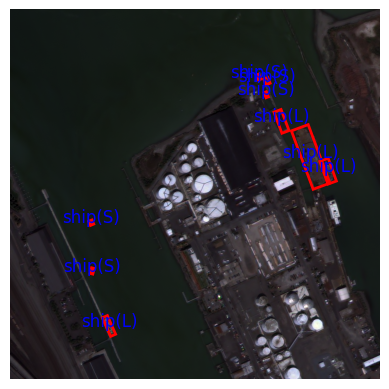

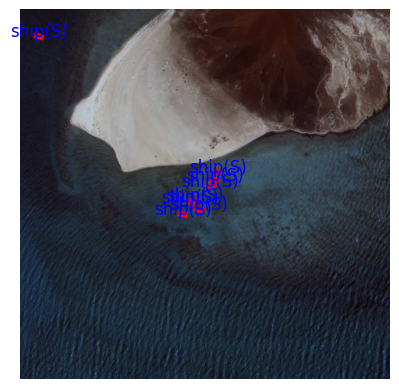

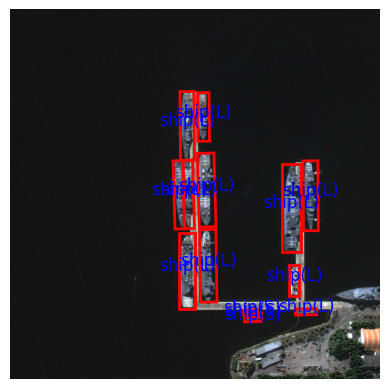

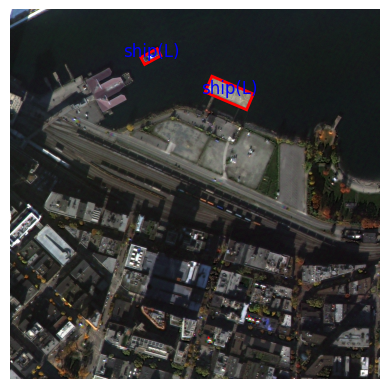

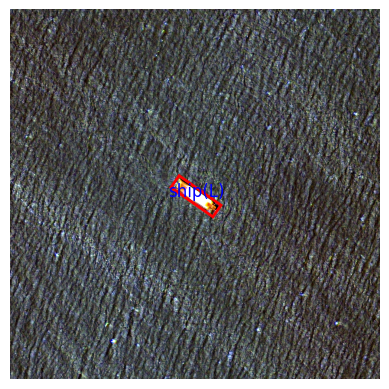

In [2]:
import os
import csv
import json
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import numpy as np

# 유클리드 거리 계산 함수
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def manhattan_distance(coords):
    x_values = coords[0::2]  # 짝수 인덱스는 x 좌표
    y_values = coords[1::2]  # 홀수 인덱스는 y 좌표
    
    # 좌표로부터 bbox의 중심 좌표(cx, cy), 너비(width), 높이(height) 계산
    x_min = min(x_values)
    x_max = max(x_values)
    y_min = min(y_values)
    y_max = max(y_values)

    width = x_max - x_min
    height = y_max - y_min
    
    return width, height


# JSON 파일을 읽어들이는 함수 (BBox 좌표와 angle 포함)
def get_bbox_from_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    results = []
    
    if 'features' in data:
        for feature in data['features']:
            if 'properties' in feature:
                # object_imcoords를 파싱하여 좌표 추출
                imcoords = feature['properties'].get('object_imcoords', '')
                if imcoords:
                    coords = list(map(float, imcoords.split(',')))

                    # 맨해튼 거리 계산
                    # width, height = manhattan_distance(coords)

                    coords = np.array(coords).reshape(-1, 2)  # 2D 좌표로 변환

                    # 중심 좌표 계산
                    cx = np.mean(coords[:, 0])
                    cy = np.mean(coords[:, 1])

                    # 인접한 두 점으로부터 너비와 높이 계산
                    width = euclidean_distance(coords[0], coords[1])
                    height = euclidean_distance(coords[1], coords[2])

                    # 각도 추출
                    angle = feature['properties'].get('object_angle', 0.0)

                    # 회전된 바운딩 박스 좌표 저장 (cx, cy, width, height, angle)
                    results.append((cx, cy, width, height, angle))
    
    return results

def get_coords_from_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    results = []
    
    if 'features' in data:
        for feature in data['features']:
            if 'properties' in feature:
                # object_imcoords를 파싱하여 좌표 추출
                imcoords = feature['properties'].get('object_imcoords', '')
                class_name = feature['properties'].get('type_name', '')
                
                if imcoords:
                    coords = list(map(float, imcoords.split(',')))

                    results.append((class_name,coords))
    return results

def save_coords_to_txt(coords_list, output_file, img_path):
    with open(output_file, 'w') as f:
        for coords in coords_list:
            class_name, coords = coords
            coords = np.array(coords) / 1024.0
    
             # 각 좌표값이 0 미만이면 0, 1 이상이면 1로 클리핑
            coords = np.clip(coords, 0, 1)

            x1, y1, x2, y2, x3, y3, x4, y4 = coords
            
            if class_name == 'ship(S)':
                f.write(f"0 {x1:.6f} {y1:.6f} {x2:.6f} {y2:.6f} {x3:.6f} {y3:.6f} {x4:.6f} {y4:.6f}\n")
            else: 
                f.write(f"1 {x1:.6f} {y1:.6f} {x2:.6f} {y2:.6f} {x3:.6f} {y3:.6f} {x4:.6f} {y4:.6f}\n")

# 바운딩 박스 정보를 txt 파일로 저장하는 함수
def save_bbox_to_txt(bbox_list, output_file, img_path):
    with open(output_file, 'w') as f:
        for bbox in bbox_list:
            cx, cy, width, height, angle = bbox
            cx, cy, width, height, angle = cx/1024, cy/1024, width/1024, height/1024, angle

            # if cx < 0 or cy < 0 or width < 0 or height < 0 or cx > 1 or cy > 1 or width > 1 or height > 1:
                # print(f"Warning: {img_path} - bbox가 이미지 밖으로 벗어납니다.")
                # visualize_image_with_bbox(img_path, bbox_list)
            if cx < 0 or cx > 1:
                cx = max(0, min(cx, 1))
            if cy < 0 or cy > 1:
                cy = max(0, min(cy, 1))
            if width < 0 or width > 1:
                width = max(0, min(width, 1))
            if height < 0 or height > 1:
                height = max(0, min(height, 1))

            f.write(f"0 {cx:.6f} {cy:.6f} {height:.6f} {width:.6f} {angle:.6f}\n")
            # f.write(f"0 {cx:.6f} {cy:.6f} {height:.6f} {width:.6f}\n")


def visualize_image_with_coords(image_path, coords_list):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for class_name, coords in coords_list:
        # coords: [x1, y1, x2, y2, x3, y3, x4, y4]
        coords = np.array(coords)
        coords = coords.reshape(4, 2)  # 4개의 좌표쌍 (x, y)으로 변환
        
        # 다각형 그리기 (4개의 좌표를 사용한 회전된 바운딩 박스)
        polygon = patches.Polygon(coords, closed=True, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(polygon)
        
        # 클래스 이름 표시 (옵션)
        cx, cy = np.mean(coords[:, 0]), np.mean(coords[:, 1])  # 중심 좌표
        ax.text(cx, cy, class_name, color='blue', fontsize=12, ha='center')

    plt.axis('off')
    plt.show()


# CSV에서 이미지 경로와 JSON 경로를 불러오는 함수
def load_csv(csv_path):
    data = []
    with open(csv_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # 헤더 스킵
        for row in reader:
            img_path, json_path = row
            data.append((img_path, json_path))
    return data

# 사용 예시
csv_path = 'valid.csv'  # CSV 파일 경로
data = load_csv(csv_path)  # 이미지와 JSON 경로 불러오기

# 5개의 이미지와 바운딩 박스를 시각화하고, BBox 정보를 txt로 저장
for i, (img_path, json_path) in enumerate(data):
    if os.path.exists(img_path) and os.path.exists(json_path):
        bbox_list = get_coords_from_json(json_path)  # JSON에서 BBox 추출
        
        # .txt 파일로 저장할 파일명 정의
        output_file = json_path.replace('.json', '.txt')  # .json 파일명을 .txt로 변경
        save_coords_to_txt(bbox_list, output_file, img_path)  # bbox 정보를 txt로 저장
        
        if i < 5:
            # 이미지와 BBox 시각화
            visualize_image_with_coords(img_path, bbox_list)


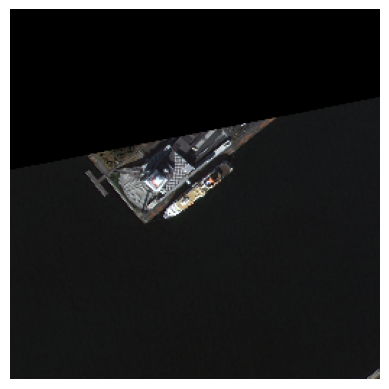

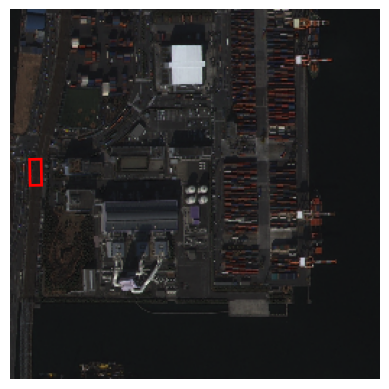

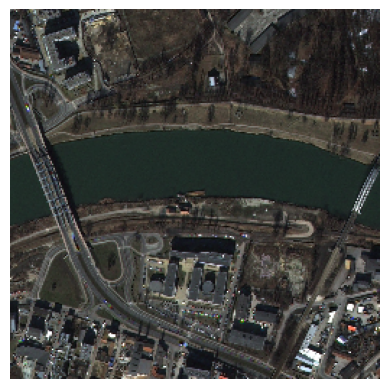

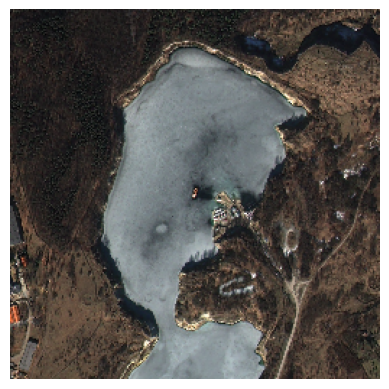

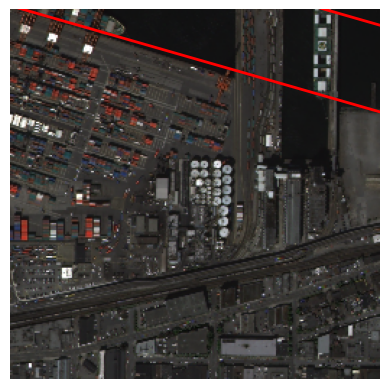

In [14]:
import os
import csv
import json
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import numpy as np

# 유클리드 거리 계산 함수
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# JSON 파일을 읽어들이는 함수 (BBox 좌표와 angle 포함)
def get_bbox_from_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    results = []
    
    if 'features' in data:
        for feature in data['features']:
            if 'properties' in feature:
                # object_imcoords를 파싱하여 좌표 추출
                imcoords = feature['properties'].get('object_imcoords', '')
                if imcoords:
                    coords = list(map(float, imcoords.split(',')))
                    coords = np.array(coords).reshape(-1, 2)  # 2D 좌표로 변환

                    # 중심 좌표 계산
                    cx = np.mean(coords[:, 0])
                    cy = np.mean(coords[:, 1])

                    # 인접한 두 점으로부터 너비와 높이 계산
                    width = euclidean_distance(coords[0], coords[1])
                    height = euclidean_distance(coords[1], coords[2])

                    # 각도 추출
                    angle = feature['properties'].get('object_angle', 0.0)

                    # 회전된 바운딩 박스 좌표 저장 (cx, cy, width, height, angle)
                    results.append((cx, cy, width, height, angle))

    return results

# 이미지와 바운딩 박스를 시각화하는 함수
def visualize_image_with_bbox(image_path, bbox_list):
    # 이미지를 불러오기
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # 바운딩 박스 그리기
    for bbox in bbox_list:
        cx, cy, width, height, angle = bbox

        # 바운딩 박스 좌표 계산 (중심 기준으로 회전)
        rect_coords = [
            [-width / 2, -height / 2],  # 좌상단
            [width / 2, -height / 2],   # 우상단
            [width / 2, height / 2],    # 우하단
            [-width / 2, height / 2]    # 좌하단
        ]

        # 회전 각도를 라디안으로 변환하여 회전 행렬 적용
        theta = np.radians(angle)
        theta = -theta  # 이미지에서 반시계 방향으로 회전하기 때문에 부호 반전
        rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        rotated_coords = np.dot(rect_coords, rotation_matrix)

        # 중심 좌표로 평행 이동
        rotated_coords[:, 0] += cx
        rotated_coords[:, 1] += cy

        # 회전된 좌표를 Polygon으로 시각화
        polygon = patches.Polygon(rotated_coords, closed=True, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(polygon)
    
    plt.axis('off')
    plt.show()

# CSV에서 이미지 경로와 JSON 경로를 불러오는 함수
def load_csv(csv_path):
    data = []
    with open(csv_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # 헤더 스킵
        for row in reader:
            img_path, json_path = row
            data.append((img_path, json_path))
    return data

# 사용 예시
csv_path = 'train.csv'  # CSV 파일 경로
data = load_csv(csv_path)  # 이미지와 JSON 경로 불러오기

# 5개의 이미지와 바운딩 박스를 시각화
for i, (img_path, json_path) in enumerate(data):
    if i >= 5:
        break
    if os.path.exists(img_path) and os.path.exists(json_path):
        bbox_list = get_bbox_from_json(json_path)  # JSON에서 BBox 추출
        visualize_image_with_bbox(img_path, bbox_list)  # 이미지와 BBox 시각화


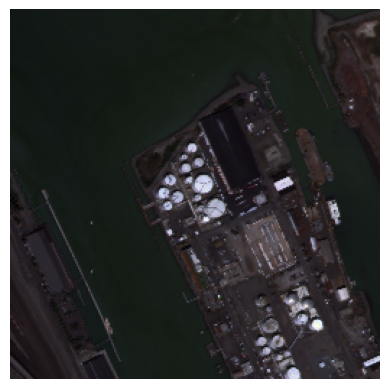

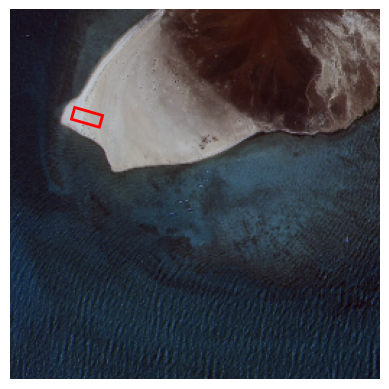

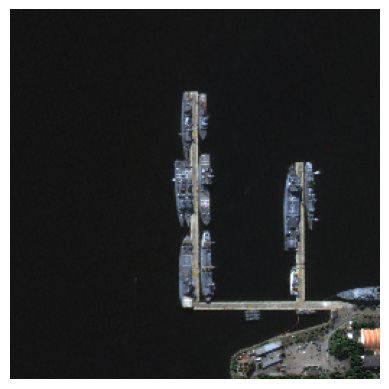

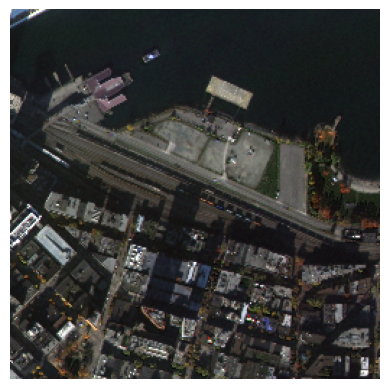

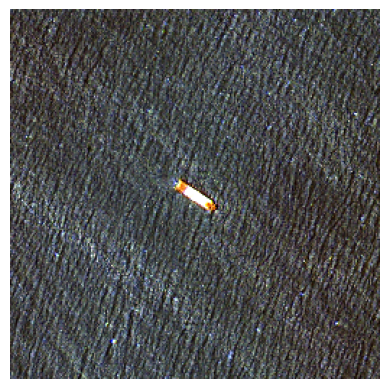

In [15]:
# 사용 예시
csv_path = 'valid.csv'  # CSV 파일 경로
data = load_csv(csv_path)  # 이미지와 JSON 경로 불러오기

# 5개의 이미지와 바운딩 박스를 시각화
for i, (img_path, json_path) in enumerate(data):
    if i >= 5:
        break
    if os.path.exists(img_path) and os.path.exists(json_path):
        bbox_list = get_bbox_from_json(json_path)  # JSON에서 BBox 추출
        visualize_image_with_bbox(img_path, bbox_list)  # 이미지와 BBox 시각화